# Navigation

---

In this notebook, we're training Banana Navigation environment using the Unity ML-Agents as a part for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Install required dependencies

In [21]:
!pip install --upgrade pip
!pip --quiet install unityagents
!pip --quiet install torch
!pip --quiet install numpy
!pip --quiet install matplotlib

Requirement already up-to-date: pip in /anaconda/lib/python3.6/site-packages (18.1)


### 1. Start the Environment

Let's import the necessary packages

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import torch.nn as nn
import time
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Download the Banana environment (binary file) for your operating system and configure file_name variable to point to the binary file.

* Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
* Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
* Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip)
* Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip)

We're going to use the file for Mac OSX.


### 2. Define DQN procedure that will be invoked to train the agent 

In [8]:
def dqn(n_episodes=4000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    starting_time = time.time()        # for timing reasons we notice the starting time
    last_time = starting_time          # time to see how long the last hundred episodes took
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    max_score = 0.                     # initialize the maximal score to zero

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        done = False
        while not done:                                    # do untill done
            action = agent.act(state, eps)                 # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f} \t Time passed: {:.1f} mins'.format(i_episode, np.mean(scores_window), (time.time() - starting_time)/60.), end="")
        if i_episode % 100 == 0:            
            print('\rEpisode {}\tAverage Score: {:.2f} \tlast 100 Episodes took {:.1f} mins'.format(i_episode, np.mean(scores_window), (time.time() - last_time)/60.))
            last_time = time.time()
        if np.mean(scores_window)>=max(13., max_score):
            print('\nNew Maximum Average Score at {:d} episodes!\tAverage Score: {:.2f} \t Time passed: {:.1f} mins'.format(i_episode, np.mean(scores_window), (time.time() - starting_time)/60.))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            max_score = np.mean(scores_window)
    return scores

### 3. Start the Environment

In [10]:
env = UnityEnvironment(file_name="Banana.app")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
Working on device: cpu


### 4. Train the agent

In [15]:
scores = dqn()

Episode 100	Average Score: 1.99 	last 100 Episodes took 2.4 mins
Episode 200	Average Score: 6.80 	last 100 Episodes took 2.4 mins
Episode 300	Average Score: 9.79 	last 100 Episodes took 2.3 mins
Episode 400	Average Score: 11.27 	last 100 Episodes took 2.4 mins
Episode 500	Average Score: 12.24 	last 100 Episodes took 2.4 mins
Episode 530	Average Score: 13.08 	 Time passed: 12.7 mins
New Maximum Average Score at 530 episodes!	Average Score: 13.08 	 Time passed: 12.7 mins
Episode 532	Average Score: 13.08 	 Time passed: 12.7 mins
New Maximum Average Score at 532 episodes!	Average Score: 13.08 	 Time passed: 12.7 mins
Episode 533	Average Score: 13.16 	 Time passed: 12.8 mins
New Maximum Average Score at 533 episodes!	Average Score: 13.16 	 Time passed: 12.8 mins
Episode 534	Average Score: 13.17 	 Time passed: 12.8 mins
New Maximum Average Score at 534 episodes!	Average Score: 13.17 	 Time passed: 12.8 mins
Episode 540	Average Score: 13.18 	 Time passed: 12.9 mins
New Maximum Average Score a

Episode 811	Average Score: 14.93 	 Time passed: 19.1 mins
New Maximum Average Score at 811 episodes!	Average Score: 14.93 	 Time passed: 19.1 mins
Episode 823	Average Score: 14.93 	 Time passed: 19.4 mins
New Maximum Average Score at 823 episodes!	Average Score: 14.93 	 Time passed: 19.4 mins
Episode 824	Average Score: 14.94 	 Time passed: 19.4 mins
New Maximum Average Score at 824 episodes!	Average Score: 14.94 	 Time passed: 19.4 mins
Episode 827	Average Score: 15.02 	 Time passed: 19.5 mins
New Maximum Average Score at 827 episodes!	Average Score: 15.02 	 Time passed: 19.5 mins
Episode 833	Average Score: 15.08 	 Time passed: 19.6 mins
New Maximum Average Score at 833 episodes!	Average Score: 15.08 	 Time passed: 19.6 mins
Episode 852	Average Score: 15.09 	 Time passed: 20.1 mins
New Maximum Average Score at 852 episodes!	Average Score: 15.09 	 Time passed: 20.1 mins
Episode 853	Average Score: 15.16 	 Time passed: 20.1 mins
New Maximum Average Score at 853 episodes!	Average Score: 15

### 5. Close the environment

In [17]:
env.close()

### 6. Plot the rewards per episode

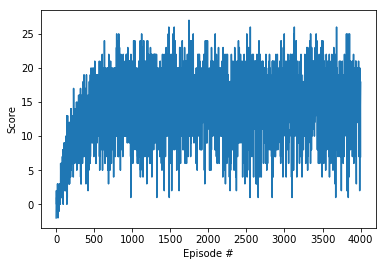

In [20]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('rewards_per_episode.png')

The workaround, if you encouter this error:
OSError: handle is closed
BrokenPipeError: [Errno 32] Broken pipe

Restart Jupyter notebook, import all the necessary packages (code block at the top of this notebook) and continue with 6 and 7 steps. 

### 6. Test the trained agent

In [2]:
env = UnityEnvironment(file_name="Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
state_size = len(state)                            # state size
action_size = brain.vector_action_space_size       # number of actions
score = 0                                          # initialize the score
done = False

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
# transferlerning from saved state and set to evaluate
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
agent.qnetwork_local.eval()

while not done:
    action =  agent.act(state, 0.01)               # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step

    
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Working on device: cpu
Score: 12.0


### 7. Close the environment

In [3]:
env.close()